### Where we experiment

In [1]:
using Plots
using SummationByPartsOperators
using LinearAlgebra
using ArraysOfArrays

In [18]:
include("../../PIC/PIC-1D/aux_functions/aux_functions_grid.jl")

get_index_and_y_alt! (generic function with 1 method)

In [3]:
J = (10,20)
Box = (0.0,2.0,0.0,1.0)
dx = differentials(Box,J)
D = 2

xv = [(i-1)*dx[1] for i in 1:J[1]]
yv = [(i-1)*dx[2] for i in 1:J[2]];

In [4]:
Dx = periodic_derivative_operator(derivative_order=1, accuracy_order=6, xmin=Box[1], xmax=Box[2], N=J[1])
Dy = periodic_derivative_operator(derivative_order=1, accuracy_order=6, xmin=Box[3], xmax=Box[4], N=J[2])

Periodic first-derivative operator of order 6 on a grid in [0.0, 1.0] using 20 nodes, 
stencils with 3 nodes to the left, 3 nodes to the right, and coefficients of Fornberg (1998) 
  Calculation of Weights in Finite Difference Formulas. 
  SIAM Rev. 40.3, pp. 685-691.

In [5]:
k = 2π*[3,3]
fe(x,y) = sin(k[1]*x)*sin(k[2]*y)
Ea = [(-1)^l*fe(xv[i],yv[j]) for l in 1:2, i in 1:J[1], j in 1:J[2]];

#grad_Ea = [(-1)^l * ( (2-m)*k[1]*cos(k[1]*xv[i])*sin(k[2]*yv[j]) + (m-1)*k[2]*sin(k[1]*xv[i])*cos(k[2]*yv[j]) ) for m in 1:2, for l in 1:2, i in 1:J[1], j in 1:J[2] ];

grad_Ea = Array{Float64,4}(undef,(D,D,J...))
grad_sbp_Ea = Array{Float64,4}(undef,(D,D,J...))

for m in 1:2
    for l in 1:2
        for i in 1:J[1]
            for j in 1:J[2]
            grad_Ea[m,l,i,j] = (-1)^l * ( (2-m)*k[1]*cos(k[1]*xv[i])*sin(k[2]*yv[j]) + (m-1)*k[2]*sin(k[1]*xv[i])*cos(k[2]*yv[j]) )
            end
        end
    end
end

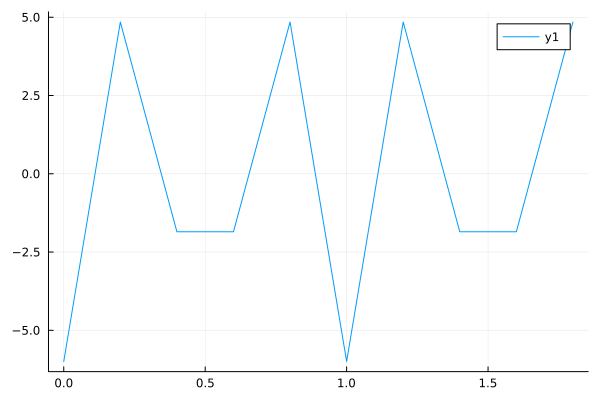

In [6]:
size(Dx)

u = sin.(k[1]*xv)
du = similar(u)
mul!(du,Dx,u)

plot(xv,du)

In [7]:
grad_sbp_Ea .= 0.0

for l in 1:2
    #for i in 1:J[1]
        for j in 1:J[2]
            mul!(view(grad_sbp_Ea,1,l,:,j), Dx, view(Ea,l,:,j),
            one(eltype(grad_sbp_Ea)), one(eltype(grad_sbp_Ea)))
        end
    #end
end

for l in 1:2
    for i in 1:J[1]
        #for j in 1:J[2]
            mul!(view(grad_sbp_Ea, 2,l,i,:), Dy, view(Ea,l,i,:),
            one(eltype(grad_sbp_Ea)), one(eltype(grad_sbp_Ea)))
        #end
    end
end

In [8]:
norm(grad_sbp_Ea - grad_Ea)

248.43166307527616

### Array of vectors version (actually not needed now because we only need the y derivativ)

In [9]:
Ev = nestedview(Ea,1)

10×20 ArrayOfSimilarVectors{Float64, 2, 3, Array{Float64, 3}}:
 [-0.0, 0.0]  [-0.0, 0.0]                  …  [0.0, -0.0]
 [0.0, -0.0]  [0.475528, -0.475528]           [-0.475528, 0.475528]
 [-0.0, 0.0]  [-0.769421, 0.769421]           [0.769421, -0.769421]
 [0.0, -0.0]  [0.769421, -0.769421]           [-0.769421, 0.769421]
 [-0.0, 0.0]  [-0.475528, 0.475528]           [0.475528, -0.475528]
 [0.0, -0.0]  [5.94456e-16, -5.94456e-16]  …  [-5.94456e-16, 5.94456e-16]
 [0.0, -0.0]  [0.475528, -0.475528]           [-0.475528, 0.475528]
 [-0.0, 0.0]  [-0.769421, 0.769421]           [0.769421, -0.769421]
 [0.0, -0.0]  [0.769421, -0.769421]           [-0.769421, 0.769421]
 [-0.0, 0.0]  [-0.475528, 0.475528]           [0.475528, -0.475528]

In [10]:
grad_sbp_Ev_x = similar(Ev)
grad_sbp_Ev_y = similar(Ev)
grad_sbp_Ev_x .= 0.0
grad_sbp_Ev_y .= 0.0

#for l in 1:2
    #for i in 1:J[1]
        for j in 1:J[2]
            mul!(view(grad_sbp_Ev_x,:,j), Dx, view(Ev,:,j),
            one(eltype(grad_sbp_Ev_x)), one(eltype(grad_sbp_Ev_x)))
        end
    #end
#end

#for l in 1:2
    for i in 1:J[1]
        #for j in 1:J[2]
            mul!(view(grad_sbp_Ev_y,i,:), Dy, view(Ev,i,:),
            one(eltype(grad_sbp_Ev_y)), one(eltype(grad_sbp_Ev_y)))
        #end
    end
#end

MethodError: MethodError: Cannot `convert` an object of type Float64 to an object of type Vector{Float64}
Closest candidates are:
  convert(::Type{T}, !Matched::Factorization) where T<:AbstractArray at /Applications/Julia-1.8.1.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/factorization.jl:58
  convert(::Type{Array{T, N}}, !Matched::StaticArraysCore.SizedArray{S, T, N, N, Array{T, N}}) where {S, T, N} at ~/.julia/packages/StaticArrays/G1WTP/src/SizedArray.jl:88
  convert(::Type{Array{T, N}}, !Matched::StaticArraysCore.SizedArray{S, T, N, M, TData} where {M, TData<:AbstractArray{T, M}}) where {T, S, N} at ~/.julia/packages/StaticArrays/G1WTP/src/SizedArray.jl:82
  ...

In [11]:
prod(J)

200

In [13]:
volume(Box)

2.0

In [14]:
volume_new(Box)

2.0

In [19]:
vol_diff(Box,J)

0.010000000000000002